# Capstone Project - The Effect of Housing Features on Price in Minneapolis Neighborhoods, Minnesota USA
### Applied Data Science Capstone Poject by Momodou Jatta

### The required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets

 Load the csv:  

In [2]:
path = 'C:/Users/m_jat/OneDrive/Desktop/IBM Certification/Applied_Data_Science_Capstone/Assessors_Parcel_Data_2019.csv'
print('Data Downloaded')

Data Downloaded


The method head is used to display the first 5 rows of the dataframe.

In [3]:
df = pd.read_csv(path)
df.head()

C:\Users\m_jat\.conda\envs\mJatta\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (33,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FID,APN,ASSESSMENT_YEAR,TAX_YEAR,ANUMBER,ST_NAME,AUNIT,ZIPCODE,FORMATTED_ADDRESS,OWNERNAME,...,NUM_STORIES,GARAGE_PRESENT,PRIMARYHEATING,CONSTRUCTIONTYPE,EXTERIORTYPE,ROOF,TOTAL_UNITS,FIREPLACES,BATHROOMS,BEDROOMS
0,1,202824120079,2019,2020,3115,13TH AVE S,NaN,55407-1626,3115 13TH AVE S,LUIS LOJA & MARIA LOJA,...,2.5,0,FORCED AIR,WOOD FRAME,METAL/VINYL,GABLE,1.0,0,1,3
1,2,202824120080,2019,2020,3111,13TH AVE S,NaN,55407-1626,3111 13TH AVE S,DAVID A OROZCO,...,2.0,2,FORCED AIR,WOOD FRAME,OTHER,GABLE,1.0,0,1,3
2,3,202824120081,2019,2020,3105,13TH AVE S,NaN,55407-1626,3105 13TH AVE S,PAUL A HOLMBOE & WIFE,...,2.0,1,FORCED AIR,WOOD FRAME,METAL/VINYL,HIP,1.0,0,2,3
3,4,202824120082,2019,2020,3101,13TH AVE S,NaN,55407-1626,3101 13TH AVE S,JORGE ROMERO,...,2.5,1,FORCED AIR,WOOD FRAME,OTHER,GABLE,1.0,0,1,4
4,5,202824120090,2019,2020,3024,BLOOMINGTON AVE,NaN,55407-1716,3024 BLOOMINGTON AVE,FILIBERTO ONOFRE,...,2.5,0,FORCED AIR,WOOD FRAME,METAL/VINYL,GABLE,2.0,0,2,4


The mehtod shape is used to determine the size of the dataframe. As it shown below, the dataframe has 130,915 rows and 53 columns.

In [4]:
df.shape

(130915, 53)

Out of the 53 columns, I chose 21 columns that I need for this report and display the first 5 rows

In [5]:
mpls_data = df[['ZIPCODE', 'FORMATTED_ADDRESS', 'NEIGHBORHOOD', 'PARCEL_AREA_SQFT', 'X', 'Y', 'PROPERTY_TYPE', 'LANDVALUE', 
                'BUILDINGVALUE', 'TOTALVALUE', 'BELOWGROUNDAREA', 'ABOVEGROUNDAREA', 'NUM_STORIES', 'GARAGE_PRESENT',
               'PRIMARYHEATING', 'CONSTRUCTIONTYPE', 'EXTERIORTYPE', 'ROOF', 'FIREPLACES', 'BATHROOMS', 'BEDROOMS']]
mpls_data.head()

,ZIPCODE,FORMATTED_ADDRESS,NEIGHBORHOOD,PARCEL_AREA_SQFT,X,Y,PROPERTY_TYPE,LANDVALUE,BUILDINGVALUE,TOTALVALUE,...,ABOVEGROUNDAREA,NUM_STORIES,GARAGE_PRESENT,PRIMARYHEATING,CONSTRUCTIONTYPE,EXTERIORTYPE,ROOF,FIREPLACES,BATHROOMS,BEDROOMS
0,55407-1626,3115 13TH AVE S,POWDERHORN PARK,4363.0,532985.647863,156549.160781,RESIDENTIAL,11300,181700,193000,...,1364,2.5,0,FORCED AIR,WOOD FRAME,METAL/VINYL,GABLE,0,1,3
1,55407-1626,3111 13TH AVE S,POWDERHORN PARK,4375.0,532985.707167,156585.587685,RESIDENTIAL,17200,203300,220500,...,1296,2.0,2,FORCED AIR,WOOD FRAME,OTHER,GABLE,0,1,3
2,55407-1626,3105 13TH AVE S,POWDERHORN PARK,4375.0,532986.047769,156621.923870,RESIDENTIAL,17000,205000,222000,...,1242,2.0,1,FORCED AIR,WOOD FRAME,METAL/VINYL,HIP,0,2,3
3,55407-1626,3101 13TH AVE S,POWDERHORN PARK,4375.0,532985.283660,156656.930591,RESIDENTIAL,15300,137700,153000,...,1440,2.5,1,FORCED AIR,WOOD FRAME,OTHER,GABLE,0,1,4
4,55407-1716,3024 BLOOMINGTON AVE,POWDERHORN PARK,3710.0,533773.038234,157074.827699,DOUBLE BUNGALOW,20200,182300,202500,...,2112,2.5,0,FORCED AIR,WOOD FRAME,METAL/VINYL,GABLE,0,2,4


Rename columns X and Y to lat and long

In [6]:
mpls_data.rename({'X': 'lat', 'Y': 'long'}, axis=1, inplace=True)
mpls_data.head()

C:\Users\m_jat\.conda\envs\mJatta\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ZIPCODE,FORMATTED_ADDRESS,NEIGHBORHOOD,PARCEL_AREA_SQFT,lat,long,PROPERTY_TYPE,LANDVALUE,BUILDINGVALUE,TOTALVALUE,...,ABOVEGROUNDAREA,NUM_STORIES,GARAGE_PRESENT,PRIMARYHEATING,CONSTRUCTIONTYPE,EXTERIORTYPE,ROOF,FIREPLACES,BATHROOMS,BEDROOMS
0,55407-1626,3115 13TH AVE S,POWDERHORN PARK,4363.0,532985.647863,156549.160781,RESIDENTIAL,11300,181700,193000,...,1364,2.5,0,FORCED AIR,WOOD FRAME,METAL/VINYL,GABLE,0,1,3
1,55407-1626,3111 13TH AVE S,POWDERHORN PARK,4375.0,532985.707167,156585.587685,RESIDENTIAL,17200,203300,220500,...,1296,2.0,2,FORCED AIR,WOOD FRAME,OTHER,GABLE,0,1,3
2,55407-1626,3105 13TH AVE S,POWDERHORN PARK,4375.0,532986.047769,156621.923870,RESIDENTIAL,17000,205000,222000,...,1242,2.0,1,FORCED AIR,WOOD FRAME,METAL/VINYL,HIP,0,2,3
3,55407-1626,3101 13TH AVE S,POWDERHORN PARK,4375.0,532985.283660,156656.930591,RESIDENTIAL,15300,137700,153000,...,1440,2.5,1,FORCED AIR,WOOD FRAME,OTHER,GABLE,0,1,4
4,55407-1716,3024 BLOOMINGTON AVE,POWDERHORN PARK,3710.0,533773.038234,157074.827699,DOUBLE BUNGALOW,20200,182300,202500,...,2112,2.5,0,FORCED AIR,WOOD FRAME,METAL/VINYL,GABLE,0,2,4


Because the dataframe is too large and rows comprise of residential, double bungalow, apartment, condos, commercial, etc. 
I limit the scope of this report to only residential and the code below is used to accomplish that task

In [7]:
mpls_data = mpls_data[mpls_data['PROPERTY_TYPE'] == 'RESIDENTIAL']

After selecting only the residential property type, the dataframe has now reduced to 75,328 rows

In [8]:
mpls_data.shape

(75328, 21)

The data types of each column is displayed using the function dtypes

In [9]:
print(mpls_data.dtypes)

ZIPCODE               object
FORMATTED_ADDRESS     object
NEIGHBORHOOD          object
PARCEL_AREA_SQFT     float64
lat                  float64
long                 float64
PROPERTY_TYPE         object
LANDVALUE              int64
BUILDINGVALUE          int64
TOTALVALUE             int64
BELOWGROUNDAREA        int64
ABOVEGROUNDAREA        int64
NUM_STORIES          float64
GARAGE_PRESENT         int64
PRIMARYHEATING        object
CONSTRUCTIONTYPE      object
EXTERIORTYPE          object
ROOF                  object
FIREPLACES             int64
BATHROOMS              int64
BEDROOMS               int64
dtype: object


<h2 id="discriptive_statistics"> Descriptive Statistical Analysis</h2>

The method describe to obtain a statistical summary of the dataframe.

In [10]:
mpls_data.describe()

,PARCEL_AREA_SQFT,lat,long,LANDVALUE,BUILDINGVALUE,TOTALVALUE,BELOWGROUNDAREA,ABOVEGROUNDAREA,NUM_STORIES,GARAGE_PRESENT,FIREPLACES,BATHROOMS,BEDROOMS
count,75313.000000,75327.000000,75326.000000,7.532800e+04,7.532800e+04,7.532800e+04,75328.000000,75328.000000,75283.000000,75328.000000,75328.000000,75328.000000,75328.000000
mean,5988.207533,529613.510225,159989.523522,7.173843e+04,2.438493e+05,3.155878e+05,871.639045,1376.063190,1.475802,1.560615,0.526059,1.775900,3.018320
std,2009.904486,9187.203291,17163.638184,9.474922e+04,1.468274e+05,2.219628e+05,288.627477,574.546537,0.421030,0.698776,0.716667,0.886768,0.940718
min,643.000000,514133.499327,136382.804567,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5078.000000,521262.980907,145491.718580,2.270000e+04,1.651000e+05,1.980000e+05,720.000000,1034.000000,1.200000,1.000000,0.000000,1.000000,2.000000
50%,5375.000000,529459.398981,153860.609874,4.480000e+04,2.147000e+05,2.645000e+05,860.000000,1257.000000,1.500000,2.000000,0.000000,2.000000,3.000000
75%,6400.000000,538037.835689,177844.240754,7.612500e+04,2.797000e+05,3.610000e+05,1010.000000,1568.000000,1.700000,2.000000,1.000000,2.000000,4.000000
max,54270.000000,547138.695710,195519.000000,1.810600e+06,3.630900e+06,5.225000e+06,5763.000000,12595.000000,3.000000,14.000000,9.000000,10.000000,12.000000


In [11]:
mpls_data.describe(include=['object'])

,ZIPCODE,FORMATTED_ADDRESS,NEIGHBORHOOD,PROPERTY_TYPE,PRIMARYHEATING,CONSTRUCTIONTYPE,EXTERIORTYPE,ROOF
count,75323,75328,75328,75328,75216,75252,75254,75241
unique,10892,75320,82,1,8,7,8,8
top,55411,304 MADISON ST,HOWE,RESIDENTIAL,FORCED AIR,WOOD FRAME,STUCCO,GABLE
freq,191,2,2489,75328,52747,74957,34149,61489


<h2 id="grouping"> Grouping</h2>


In [12]:
df_group_one = mpls_data[['PRIMARYHEATING','CONSTRUCTIONTYPE','BUILDINGVALUE']]

In [13]:
# grouping results
df_group_one = df_group_one.groupby(['PRIMARYHEATING'],as_index=False).mean()
df_group_one

,PRIMARYHEATING,BUILDINGVALUE
0,ELECTRIC,148578.625954
1,FORCED AIR,226756.243957
2,GEOTHERMAL,841377.500000
3,GRAVITY,161065.417256
4,HOT WATER,301815.756115
5,RADIANT FLOOR,502555.555556
6,STEAM,483065.034965
7,UNIT HEATERS,121676.555024


In [14]:
df_group_one = mpls_data[['CONSTRUCTIONTYPE','BUILDINGVALUE']]

In [15]:
# grouping results
df_group_one = df_group_one.groupby(['CONSTRUCTIONTYPE'],as_index=False).mean()
df_group_one

,CONSTRUCTIONTYPE,BUILDINGVALUE
0,BRICK & MILL,444228.421053
1,CONCRETE,561040.000000
2,METAL,376200.000000
3,OTHER,361300.000000
4,REINFORCED CONCRETE,660821.428571
5,STEEL FRAME,367929.411765
6,WOOD FRAME,242848.606534


In [16]:
df_group_one = mpls_data[['EXTERIORTYPE','BUILDINGVALUE']]

In [17]:
# grouping results
df_group_one = df_group_one.groupby(['EXTERIORTYPE'],as_index=False).mean()
df_group_one

,EXTERIORTYPE,BUILDINGVALUE
0,BRICK,406892.531705
1,CONCRETE,420098.305085
2,FIBER CEMENT BOARD,410577.536946
3,METAL/VINYL,205204.886799
4,OTHER,180485.735115
5,STONE,563175.229358
6,STUCCO,251052.487628
7,WOOD,250461.232968


In [18]:
# grouping results
df_gptest2 = mpls_data[['ROOF','BUILDINGVALUE']]
grouped_test_bodystyle = df_gptest2.groupby(['ROOF'],as_index= False).mean()
grouped_test_bodystyle

,ROOF,BUILDINGVALUE
0,CURVED,131200.000000
1,DORMERS,517566.666667
2,FLAT,487314.285714
3,GABLE,234420.681748
4,GAMBREL,272766.173362
5,HIP,280136.134454
6,MANSARD,506101.265823
7,SHED,380957.142857


The dataframe is group by both 'construction type' and 'roof type'. This groups the dataframe by the unique combinations 'construction type' and 'roof'.

In [19]:
# grouping results
df_gptest = mpls_data[['CONSTRUCTIONTYPE','ROOF','BUILDINGVALUE']]
grouped_test1 = df_gptest.groupby(['CONSTRUCTIONTYPE','ROOF'],as_index=False).mean()
grouped_test1

,CONSTRUCTIONTYPE,ROOF,BUILDINGVALUE
0,BRICK & MILL,FLAT,4.095667e+05
1,BRICK & MILL,GABLE,3.767678e+05
2,BRICK & MILL,GAMBREL,8.212667e+05
3,BRICK & MILL,HIP,5.038360e+05
4,BRICK & MILL,MANSARD,6.101000e+05
5,CONCRETE,FLAT,6.527118e+05
6,CONCRETE,GABLE,4.814597e+05
7,CONCRETE,GAMBREL,9.009000e+05
8,CONCRETE,HIP,6.716258e+05
9,CONCRETE,SHED,3.497000e+05


A pivot table is used for better visualization.  

In [20]:
grouped_pivot = grouped_test1.pivot(index='CONSTRUCTIONTYPE',columns='ROOF')
grouped_pivot

BUILDINGVALUE                                              \
ROOF                       CURVED        DORMERS          FLAT          GABLE   
CONSTRUCTIONTYPE                                                                
BRICK & MILL                  NaN            NaN  4.095667e+05  376767.796610   
CONCRETE                      NaN            NaN  6.527118e+05  481459.722222   
METAL                         NaN            NaN           NaN  376200.000000   
OTHER                         NaN            NaN  1.850000e+05  295036.842105   
REINFORCED CONCRETE           NaN            NaN  9.464167e+05  596931.250000   
STEEL FRAME                   NaN            NaN  3.480200e+06  169542.857143   
WOOD FRAME               131200.0  517566.666667  4.615763e+05  233891.539528   

                                                                            
ROOF                       GAMBREL            HIP   MANSARD           SHED  
CONSTRUCTIONTYPE                                                            
BRICK & MILL         821266.666667  503836.000000  610100.0            NaN  
CONCRETE             900900.000000  671625.806452       NaN  349700.000000  
METAL                          NaN            NaN       NaN            NaN  
OTHER                          NaN  591528.571429       NaN            NaN  
REINFORCED CONCRETE            NaN  580400.000000       NaN  371600.000000  
STEEL FRAME                    NaN  200500.000000       NaN            NaN  
WOOD FRAME           269095.673759  278385.887029  503400.0  383094.736842

The missing values are fill with 0 value

In [21]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

BUILDINGVALUE                                              \
ROOF                       CURVED        DORMERS          FLAT          GABLE   
CONSTRUCTIONTYPE                                                                
BRICK & MILL                  0.0       0.000000  4.095667e+05  376767.796610   
CONCRETE                      0.0       0.000000  6.527118e+05  481459.722222   
METAL                         0.0       0.000000  0.000000e+00  376200.000000   
OTHER                         0.0       0.000000  1.850000e+05  295036.842105   
REINFORCED CONCRETE           0.0       0.000000  9.464167e+05  596931.250000   
STEEL FRAME                   0.0       0.000000  3.480200e+06  169542.857143   
WOOD FRAME               131200.0  517566.666667  4.615763e+05  233891.539528   

                                                                            
ROOF                       GAMBREL            HIP   MANSARD           SHED  
CONSTRUCTIONTYPE                                                            
BRICK & MILL         821266.666667  503836.000000  610100.0       0.000000  
CONCRETE             900900.000000  671625.806452       0.0  349700.000000  
METAL                     0.000000       0.000000       0.0       0.000000  
OTHER                     0.000000  591528.571429       0.0       0.000000  
REINFORCED CONCRETE       0.000000  580400.000000       0.0  371600.000000  
STEEL FRAME               0.000000  200500.000000       0.0       0.000000  
WOOD FRAME           269095.673759  278385.887029  503400.0  383094.736842

(0.0, 3812445.0)

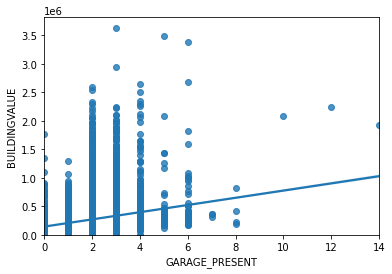

In [22]:
# Garage_present as predictor variable of building value
sns.regplot(x="GARAGE_PRESENT", y="BUILDINGVALUE", data=mpls_data)
plt.ylim(0,)

# Module 2: Data Wrangling

The correlation between variables  of type "int64" or "float64" are calculated using the method "corr"

In [24]:
mpls_data.corr()

,PARCEL_AREA_SQFT,lat,long,LANDVALUE,BUILDINGVALUE,TOTALVALUE,BELOWGROUNDAREA,ABOVEGROUNDAREA,NUM_STORIES,GARAGE_PRESENT,FIREPLACES,BATHROOMS,BEDROOMS
PARCEL_AREA_SQFT,1.000000,-0.118563,-0.037254,0.575397,0.357893,0.482362,0.415074,0.453493,0.132902,0.243271,0.360146,0.353681,0.224987
lat,-0.118563,1.000000,-0.188511,-0.286888,-0.110249,-0.195394,-0.164800,-0.226236,-0.145498,-0.023582,-0.192883,-0.189273,-0.147942
long,-0.037254,-0.188511,1.000000,-0.308926,-0.295164,-0.327128,-0.128683,-0.123491,-0.073202,-0.068377,-0.257766,-0.143066,-0.042815
LANDVALUE,0.575397,-0.286888,-0.308926,1.000000,0.673235,0.872212,0.461243,0.620482,0.288749,0.222736,0.500328,0.509631,0.246548
BUILDINGVALUE,0.357893,-0.110249,-0.295164,0.673235,1.000000,0.948879,0.558674,0.793681,0.442547,0.300498,0.542963,0.672218,0.416887
TOTALVALUE,0.482362,-0.195394,-0.327128,0.872212,0.948879,1.000000,0.566451,0.789881,0.415956,0.293857,0.572743,0.662215,0.381013
BELOWGROUNDAREA,0.415074,-0.164800,-0.128683,0.461243,0.558674,0.566451,1.000000,0.594817,0.022481,0.242454,0.501608,0.469452,0.392869
ABOVEGROUNDAREA,0.453493,-0.226236,-0.123491,0.620482,0.793681,0.789881,0.594817,1.000000,0.643532,0.256607,0.513397,0.694657,0.592811
NUM_STORIES,0.132902,-0.145498,-0.073202,0.288749,0.442547,0.415956,0.022481,0.643532,1.000000,0.118247,0.178515,0.404506,0.416869
GARAGE_PRESENT,0.243271,-0.023582,-0.068377,0.222736,0.300498,0.293857,0.242454,0.256607,0.118247,1.000000,0.193424,0.267859,0.170274


The isnull method is used to determine missing values of the dataframe

In [25]:
missing_data = mpls_data.isnull()
missing_data.head(5)

,ZIPCODE,FORMATTED_ADDRESS,NEIGHBORHOOD,PARCEL_AREA_SQFT,lat,long,PROPERTY_TYPE,LANDVALUE,BUILDINGVALUE,TOTALVALUE,...,ABOVEGROUNDAREA,NUM_STORIES,GARAGE_PRESENT,PRIMARYHEATING,CONSTRUCTIONTYPE,EXTERIORTYPE,ROOF,FIREPLACES,BATHROOMS,BEDROOMS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Count missing values in each column

In [26]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

ZIPCODE
False    75323
True         5
Name: ZIPCODE, dtype: int64

FORMATTED_ADDRESS
False    75328
Name: FORMATTED_ADDRESS, dtype: int64

NEIGHBORHOOD
False    75328
Name: NEIGHBORHOOD, dtype: int64

PARCEL_AREA_SQFT
False    75313
True        15
Name: PARCEL_AREA_SQFT, dtype: int64

lat
False    75327
True         1
Name: lat, dtype: int64

long
False    75326
True         2
Name: long, dtype: int64

PROPERTY_TYPE
False    75328
Name: PROPERTY_TYPE, dtype: int64

LANDVALUE
False    75328
Name: LANDVALUE, dtype: int64

BUILDINGVALUE
False    75328
Name: BUILDINGVALUE, dtype: int64

TOTALVALUE
False    75328
Name: TOTALVALUE, dtype: int64

BELOWGROUNDAREA
False    75328
Name: BELOWGROUNDAREA, dtype: int64

ABOVEGROUNDAREA
False    75328
Name: ABOVEGROUNDAREA, dtype: int64

NUM_STORIES
False    75283
True        45
Name: NUM_STORIES, dtype: int64

GARAGE_PRESENT
False    75328
Name: GARAGE_PRESENT, dtype: int64

PRIMARYHEATING
False    75216
True       112
Name: PRIMARYHEATING, dtype: i

The missing values are replaced using either the mean method or the frequency method

In [27]:
mpls_data['ZIPCODE'].value_counts().idxmax()

'55411'

In [28]:
#replace the missing 'zipcode' values by the most frequent 
mpls_data['ZIPCODE'].replace(np.nan, '55411', inplace=True)

In [29]:
avg_area_sqft = mpls_data['PARCEL_AREA_SQFT'].astype('float').mean(axis=0)
print("Average PARCEL_AREA_SQFT:", avg_area_sqft)

Average PARCEL_AREA_SQFT: 5988.2075333607745


In [30]:
mpls_data['PARCEL_AREA_SQFT'].replace(np.nan, avg_area_sqft, inplace=True)

In [31]:
mpls_data['lat'].value_counts().idxmax()

519112.0

In [32]:
#replace the missing 'lat' values by the most frequent 
mpls_data['lat'].replace(np.nan, '519112.0', inplace=True)

In [33]:
mpls_data['long'].value_counts().idxmax()

147635.264392

In [34]:
#replace the missing 'long' values by the most frequent 
mpls_data['long'].replace(np.nan, '147635.2644', inplace=True)

In [35]:
mpls_data['NUM_STORIES'].value_counts().idxmax()

1.2

In [36]:
#replace the missing 'NUM_STORIES' values by the most frequent 
mpls_data['NUM_STORIES'].replace(np.nan, '1.2', inplace=True)

In [37]:
mpls_data['PRIMARYHEATING'].value_counts().idxmax()

'FORCED AIR'

In [38]:
#replace the missing 'PRIMARYHEATING' values by the most frequent 
mpls_data['PRIMARYHEATING'].replace(np.nan, 'FORCED AIR', inplace=True)

In [39]:
mpls_data['CONSTRUCTIONTYPE'].value_counts().idxmax()

'WOOD FRAME'

In [40]:
#replace the missing 'CONSTRUCTIONTYPE' values by the most frequent 
mpls_data['CONSTRUCTIONTYPE'].replace(np.nan, 'WOOD FRAME', inplace=True)

In [41]:
mpls_data['EXTERIORTYPE'].value_counts().idxmax()

'STUCCO'

In [42]:
#replace the missing 'EXTERIORTYPE' values by the most frequent 
mpls_data['EXTERIORTYPE'].replace(np.nan, 'STUCCO', inplace=True)

In [43]:
mpls_data['ROOF'].value_counts().idxmax()

'GABLE'

In [44]:
#replace the missing '' values by the most frequent 
mpls_data['ROOF'].replace(np.nan, 'GABLE', inplace=True)

Re-examine the dataframe after replacing missing values.

In [45]:
mpls_data.head()

,ZIPCODE,FORMATTED_ADDRESS,NEIGHBORHOOD,PARCEL_AREA_SQFT,lat,long,PROPERTY_TYPE,LANDVALUE,BUILDINGVALUE,TOTALVALUE,...,ABOVEGROUNDAREA,NUM_STORIES,GARAGE_PRESENT,PRIMARYHEATING,CONSTRUCTIONTYPE,EXTERIORTYPE,ROOF,FIREPLACES,BATHROOMS,BEDROOMS
0,55407-1626,3115 13TH AVE S,POWDERHORN PARK,4363.0,532986,156549,RESIDENTIAL,11300,181700,193000,...,1364,2.5,0,FORCED AIR,WOOD FRAME,METAL/VINYL,GABLE,0,1,3
1,55407-1626,3111 13TH AVE S,POWDERHORN PARK,4375.0,532986,156586,RESIDENTIAL,17200,203300,220500,...,1296,2,2,FORCED AIR,WOOD FRAME,OTHER,GABLE,0,1,3
2,55407-1626,3105 13TH AVE S,POWDERHORN PARK,4375.0,532986,156622,RESIDENTIAL,17000,205000,222000,...,1242,2,1,FORCED AIR,WOOD FRAME,METAL/VINYL,HIP,0,2,3
3,55407-1626,3101 13TH AVE S,POWDERHORN PARK,4375.0,532985,156657,RESIDENTIAL,15300,137700,153000,...,1440,2.5,1,FORCED AIR,WOOD FRAME,OTHER,GABLE,0,1,4
5,55407-1705,3029 15TH AVE S,POWDERHORN PARK,3705.0,533635,157045,RESIDENTIAL,6200,206300,212500,...,1299,1.7,2,HOT WATER,WOOD FRAME,METAL/VINYL,GABLE,0,1,3


Display the data type

In [46]:
mpls_data.dtypes

ZIPCODE               object
FORMATTED_ADDRESS     object
NEIGHBORHOOD          object
PARCEL_AREA_SQFT     float64
lat                   object
long                  object
PROPERTY_TYPE         object
LANDVALUE              int64
BUILDINGVALUE          int64
TOTALVALUE             int64
BELOWGROUNDAREA        int64
ABOVEGROUNDAREA        int64
NUM_STORIES           object
GARAGE_PRESENT         int64
PRIMARYHEATING        object
CONSTRUCTIONTYPE      object
EXTERIORTYPE          object
ROOF                  object
FIREPLACES             int64
BATHROOMS              int64
BEDROOMS               int64
dtype: object

Convert selected columns to proper data type

In [47]:
mpls_data[["LANDVALUE", "BUILDINGVALUE"]] = mpls_data[["LANDVALUE", "BUILDINGVALUE"]].astype("float")
mpls_data[["TOTALVALUE"]] = mpls_data[["TOTALVALUE"]].astype("float")

# Module 3: Exploratory Data Analysis

In [33]:
# df['NUM_STORIES'].value_counts().to_frame()

<h3>Categorical variables</h3>

<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The 
categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.
</p>


I check the relationship between "Primaryheating" and "Buildingvalue" of the house.

<AxesSubplot:xlabel='PRIMARYHEATING', ylabel='BUILDINGVALUE'>

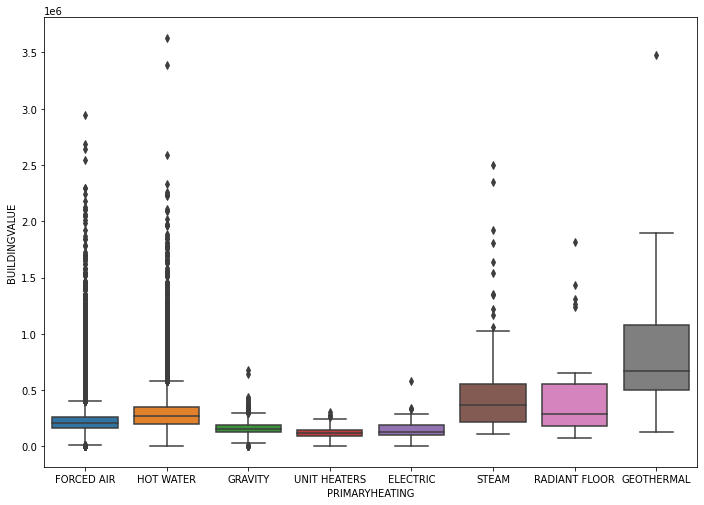

In [48]:
from matplotlib import pyplot

a4_dims = (11.7, 8.27)
data = mpls_data
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.boxplot(x = 'PRIMARYHEATING', y = 'BUILDINGVALUE', data=mpls_data)

The relationship between "Exteriortype" and "Buildingvalue" of the house.

<AxesSubplot:xlabel='EXTERIORTYPE', ylabel='BUILDINGVALUE'>

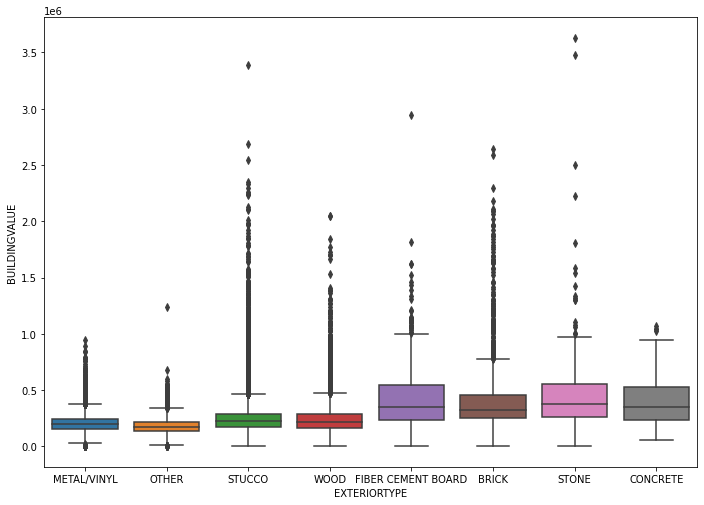

In [49]:
a4_dims = (11.7, 8.27)
data = mpls_data
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.boxplot(x = 'EXTERIORTYPE', y = 'BUILDINGVALUE', data=mpls_data)

The relationship between "Constructiontype" and "Buildingvalue" of the house.

<AxesSubplot:xlabel='CONSTRUCTIONTYPE', ylabel='BUILDINGVALUE'>

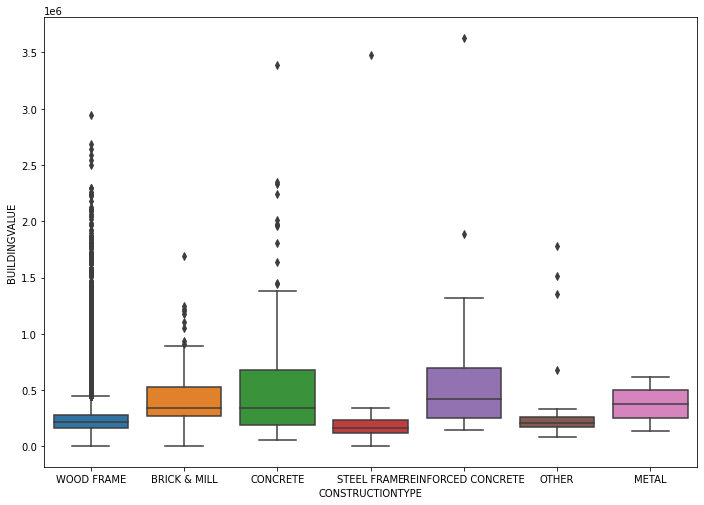

In [50]:
a4_dims = (11.7, 8.27)
data = mpls_data
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.boxplot(x = 'CONSTRUCTIONTYPE', y = 'BUILDINGVALUE', data=mpls_data)

The relationship between "Roof" and "Buildingvalue" of the house.

<AxesSubplot:xlabel='ROOF', ylabel='BUILDINGVALUE'>

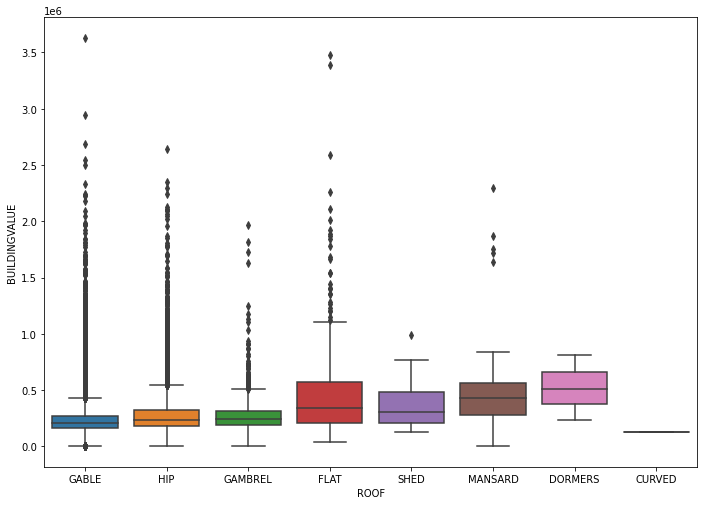

In [51]:
a4_dims = (11.7, 8.27)
data = mpls_data
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.boxplot(x = 'ROOF', y = 'BUILDINGVALUE', data=mpls_data)

The function regplot in the seaborn library is used to determine if the feature abovegroundarea is negatively or positively 
correlated with totalvaule.

<AxesSubplot:xlabel='ABOVEGROUNDAREA', ylabel='TOTALVALUE'>

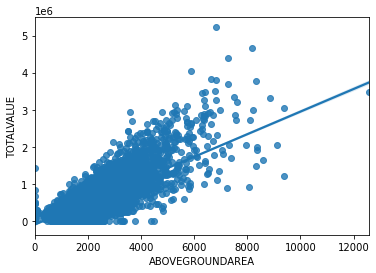

In [52]:
sns.regplot(x = 'ABOVEGROUNDAREA', y = 'TOTALVALUE', data=mpls_data)

In [53]:
mpls_data.corr()['TOTALVALUE'].sort_values()

GARAGE_PRESENT      0.293857
BEDROOMS            0.381013
PARCEL_AREA_SQFT    0.482285
BELOWGROUNDAREA     0.566451
FIREPLACES          0.572743
BATHROOMS           0.662215
ABOVEGROUNDAREA     0.789881
LANDVALUE           0.872212
BUILDINGVALUE       0.948879
TOTALVALUE          1.000000
Name: TOTALVALUE, dtype: float64

The function regplot in the seaborn library is used to determine if the feature bedrooms is negatively or positively 
correlated with totalvaule.


(0.0, 5486250.0)

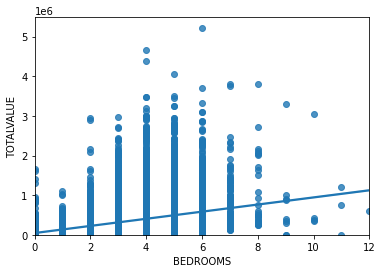

In [54]:
# Engine size as potential predictor variable of price
sns.regplot(x="BEDROOMS", y="TOTALVALUE", data=mpls_data)
plt.ylim(0,)

<AxesSubplot:xlabel='FIREPLACES', ylabel='TOTALVALUE'>

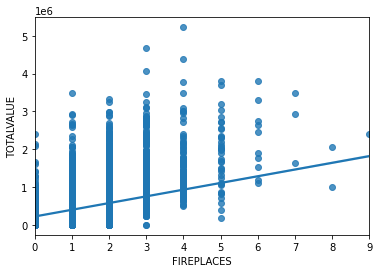

In [55]:
sns.regplot(x="FIREPLACES", y="TOTALVALUE", data=mpls_data)

<AxesSubplot:xlabel='BATHROOMS', ylabel='TOTALVALUE'>

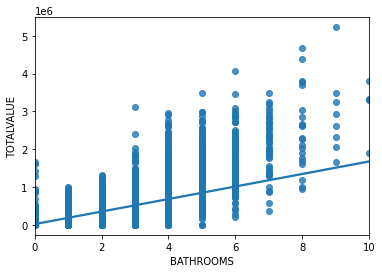

In [56]:
sns.regplot(x="BATHROOMS", y="TOTALVALUE", data=mpls_data)

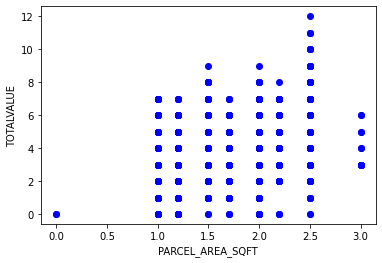

In [57]:
plt.scatter(mpls_data.NUM_STORIES, mpls_data.BEDROOMS,  color='blue')
plt.xlabel("PARCEL_AREA_SQFT")
plt.ylabel("TOTALVALUE")
plt.show()

In [58]:
from scipy import stats

 The Pearson Correlation Coefficient and P-value of 'BEDROOMS' and 'BUILDINGVALUE'.

In [59]:
pearson_coef, p_value = stats.pearsonr(mpls_data['BEDROOMS'], mpls_data['TOTALVALUE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.3810128178868299  with a P-value of P = 0.0


The Pearson Correlation Coefficient and P-value of 'FIREPLACES' and 'BUILDINGVALUE'.

In [60]:
pearson_coef, p_value = stats.pearsonr(mpls_data['FIREPLACES'], mpls_data['TOTALVALUE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5727427014314311  with a P-value of P = 0.0


The Pearson Correlation Coefficient and P-value of 'BATHROOMS' and 'BUILDINGVALUE'.

In [61]:
pearson_coef, p_value = stats.pearsonr(mpls_data['BATHROOMS'], mpls_data['TOTALVALUE'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.6622152395520273  with a P-value of P = 0.0


# Module 4: Model Development

Fit a linear regression model using the longitude feature 'Y' and caculate the R^2.

In [62]:
X = mpls_data[['long']]
Y = mpls_data['TOTALVALUE']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.10698985521930415

Fit a linear regression model to predict the 'totalvalue' using the feature 'abovegroundarea' then the R^2 is calculated.

In [63]:
X = mpls_data[['ABOVEGROUNDAREA']]
Y = mpls_data['TOTALVALUE']
lm1 = LinearRegression()
lm1.fit(X,Y)

LinearRegression()

In [64]:
Yhat = lm1.predict(X)
Yhat[0:5]

array([311906.67196632, 291156.30511071, 274678.07260772, 335098.25845201,
       292071.76247198])

In [65]:
print('The R-square is: ', lm1.score(X, Y))

The R-square is:  0.6239123580483767


Import the necessary modules:

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


Fit a linear regression model to predict the 'Totalvalue' using the list of features:

In [67]:
features =["NUM_STORIES", "GARAGE_PRESENT","lat" ,"PARCEL_AREA_SQFT" ,"BEDROOMS" ,"FIREPLACES" ,"BELOWGROUNDAREA", "BATHROOMS", "ABOVEGROUNDAREA"]
X = mpls_data[features]
Y = mpls_data['TOTALVALUE']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 15066
number of training samples: 60262


In [68]:
lm2 = LinearRegression()

In [69]:
# lm2.fit(mpls_data[features], mpls_data['BUILDINGVALUE'])
# lm2.fit(mpls_data[features], mpls_data['BUILDINGVALUE'])
print("number of NaN values for the column BUILDINGVALUE :", mpls_data['BUILDINGVALUE'].isnull().sum())

number of NaN values for the column BUILDINGVALUE : 0


In [70]:
lm2.fit(mpls_data[features], mpls_data['TOTALVALUE'])

LinearRegression()

In [71]:
Yhat=lm2.predict(X)
Yhat[0:5] 

array([184626.13943979, 206392.73392883, 227525.3640789 , 177280.56951925,
       210644.46174646])

The R^2 value is calculated.

In [72]:
print('The R-square is: ', lm2.score(X, Y))

The R-square is:  0.7094021123457488


In [73]:
new_input = np.arange(1, 100, 1).reshape(-1, 9)

In [74]:
lm.fit(X, Y)
lm

LinearRegression()

In [75]:
yhat=lm.predict(new_input)
yhat[0:5]

array([ 416088.66517713,  951394.46165453, 1486700.25813193,
       2022006.05460932, 2557311.85108672])

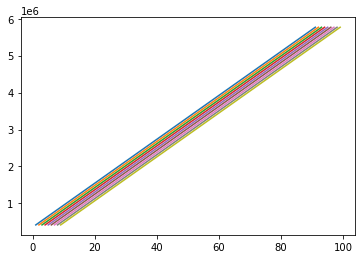

In [76]:
plt.plot(new_input, yhat)
plt.show()


A list of tuples has been created and the first element in the tuple contains the name of the estimator:

<code>'scale'</code>

<code>'polynomial'</code>

<code>'model'</code>

The second element in the tuple  contains the model constructor 

<code>StandardScaler()</code>

<code>PolynomialFeatures(include_bias=False)</code>

<code>LinearRegression()</code>

In [77]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [78]:
features =["NUM_STORIES", "GARAGE_PRESENT","lat" ,"PARCEL_AREA_SQFT" ,"BEDROOMS" ,"FIREPLACES" ,"BELOWGROUNDAREA","BATHROOMS", "ABOVEGROUNDAREA"]
X = mpls_data[features]
Y = mpls_data['TOTALVALUE']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 22599
number of training samples: 52729


Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list 
<code>features</code>, and calculate the R^2.

In [79]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [80]:
pipe.fit(mpls_data[features], mpls_data['TOTALVALUE'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [81]:
ypipe=pipe.predict(mpls_data[features])
ypipe[0:5]

array([217077.66296527, 220344.73728205, 222126.39688672, 229325.86130703,
       220824.85924383])

In [82]:
print('The R-square is: ', pipe.score(X, Y))

The R-square is:  0.7836085839573675


# Module 5: Model Evaluation and Refinement

In [83]:
features =["NUM_STORIES", "GARAGE_PRESENT","lat" ,"PARCEL_AREA_SQFT" ,"BEDROOMS" ,"FIREPLACES" ,"BELOWGROUNDAREA","BATHROOMS", "ABOVEGROUNDAREA"]
X = mpls_data[features]
Y = mpls_data['TOTALVALUE']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 7533
number of training samples: 67795


Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 
using the test data. 

In [84]:
from sklearn.linear_model import Ridge

In [85]:
RigeModel = Ridge(alpha=0.1)

In [86]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [87]:
print('The R-square is: ', RigeModel.score(x_train, y_train))

The R-square is:  0.7100361538231975


In [88]:
print('The R-square is: ', RigeModel.score(x_test, y_test))

The R-square is:  0.7029591125359533


Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object
using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. 

In [89]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[["NUM_STORIES", "GARAGE_PRESENT","lat" ,"PARCEL_AREA_SQFT" ,"BEDROOMS" ,"FIREPLACES" ,"BELOWGROUNDAREA","BATHROOMS","ABOVEGROUNDAREA"]])
x_test_pr=pr.fit_transform(x_test[["NUM_STORIES", "GARAGE_PRESENT","lat" ,"PARCEL_AREA_SQFT" ,"BEDROOMS" ,"FIREPLACES" ,"BELOWGROUNDAREA","BATHROOMS","ABOVEGROUNDAREA"]])

In [90]:
poly = LinearRegression(0.1)
poly.fit(x_train_pr, y_train)

C:\Users\m_jat\.conda\envs\mJatta\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass fit_intercept=0.1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


LinearRegression(fit_intercept=0.1)

In [91]:
print('The R-square is: ', poly.score(x_train_pr, y_train))

The R-square is:  0.7847696530237769


In [92]:
print('The R-square is: ', poly.score(x_test_pr, y_test))

The R-square is:  0.7713001435645377


In [93]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([327547.55438121, 317579.84844249, 248251.781934  , 344476.20898426,
       400189.2838369 ])

# Segmenting and Clustering Neighborhoods in Minneapolis

#### This section of the project explores, segments,and clusters the neighborhoods in the city of Minneapolis.

The following libraries and dependencies needed in this section will be downloaded.

In [94]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


I use the following codes below to find out the latitude and longitude values of Minneapolis, Minnesota

In [95]:
address = 'Minneapolis'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Minneapolis are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Minneapolis are 44.9772995, -93.2654692.


#### Foursquare Credentials and Version are defined in the cell below

In [96]:
# #hidden_cells
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

#### I get the top 100 venues that are within a radius of 500 meters and create the GET request URL. Name your URL **url**..

In [97]:
# The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=TE21LQXEXXPJ443TUPHVUHZ1043YK3QI2ACU51UPTT4KC04C&client_secret=QZ5MOCROBAZKIUP0QKZVL0J40DHDXB4PBKWTHWXXPBWDKDPW&v=20180605&ll=44.9772995,-93.2654692&radius=500&limit=100'

The GET request is sent and the resutls are examined

In [98]:
results = requests.get(url).json()
results
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '55ba4385498ef4d3cd7dd0ef',
  'name': 'Naf Naf Grill',
  'location': {'address': '200 S 6th St',
   'crossStreet': '@ 2nd Ave S',
   'lat': 44.97702486729616,
   'lng': -93.26777030247726,
   'labeledLatLngs': [{'label': 'display',
     'lat': 44.97702486729616,
     'lng': -93.26777030247726}],
   'distance': 183,
   'postalCode': '55402',
   'cc': 'US',
   'city': 'Minneapolis',
   'state': 'MN',
   'country': 'United States',
   'formattedAddress': ['200 S 6th St (@ 2nd Ave S)',
    'Minneapolis, MN 55402',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d115941735',
    'name': 'Middle Eastern Restaurant',
    'pluralName': 'Middle Eastern Restaurants',
    'shortName': 'Middle Eastern',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/middleeastern_',
     'suffix': '.png'},
    'primary': 

The function below extracts the category of the venue

In [99]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

C:\Users\m_jat\.conda\envs\mJatta\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,Naf Naf Grill,Middle Eastern Restaurant,200 S 6th St,@ 2nd Ave S,44.977025,-93.267770,"[{'label': 'display', 'lat': 44.97702486729616...",183,55402,US,Minneapolis,MN,United States,"[200 S 6th St (@ 2nd Ave S), Minneapolis, MN 5...",NaN,55ba4385498ef4d3cd7dd0ef
1,Green + The Grain,Salad Place,NaN,NaN,44.977052,-93.267377,"[{'label': 'display', 'lat': 44.97705201279017...",152,55402,US,Minneapolis,MN,United States,"[Minneapolis, MN 55402, United States]",Downtown West,538cac5e498e0039dd186b0b
2,The Armory,Music Venue,500 S 6th St,NaN,44.975257,-93.263510,"[{'label': 'display', 'lat': 44.97525716504703...",274,55415,US,Minneapolis,MN,United States,"[500 S 6th St, Minneapolis, MN 55415, United S...",Elliot Park,4bcf8677046076b0e0826e71
3,So Good Asian,Chinese Restaurant,NaN,NaN,44.977344,-93.267680,"[{'label': 'display', 'lat': 44.97734415666336...",174,55402,US,Minneapolis,MN,United States,"[Minneapolis, MN 55402, United States]",NaN,50897dcfe4b0ef1360564bb4
4,Allie's Rand Deli,Deli / Bodega,527 Marquette Ave (Rand Tower),NaN,44.977128,-93.269590,"[{'label': 'display', 'lat': 44.97712785692023...",325,55402,US,Minneapolis,MN,United States,"[527 Marquette Ave (Rand Tower), Minneapolis, ...",NaN,4b4cc7adf964a52091be26e3
5,Eastside Restaurant,New American Restaurant,305 Washington Ave S,3rd Avenue,44.979767,-93.264059,"[{'label': 'display', 'lat': 44.97976737642067...",296,55415,US,Minneapolis,MN,United States,"[305 Washington Ave S (3rd Avenue), Minneapoli...",NaN,56008dc4498e50d63bb7ea13
6,Crazy Tacos,Taco Place,330 2nd Ave S,Skyway,44.979377,-93.266593,"[{'label': 'display', 'lat': 44.97937662958928...",247,55401,US,Minneapolis,MN,United States,"[330 2nd Ave S (Skyway), Minneapolis, MN 55401...",NaN,4a9d50c7f964a520203820e3
7,Moral Omnivore Foodtruck,Food Truck,NaN,NaN,44.976931,-93.268434,"[{'label': 'display', 'lat': 44.97693073907338...",237,NaN,US,Minneapolis,MN,United States,"[Minneapolis, MN, United States]",NaN,517964d3498eac4e74710540
8,Kimpton Grand Hotel Minneapolis,Hotel,615 2nd Ave S,btwn S. 6th St. & S. 7th St.,44.975921,-93.268850,"[{'label': 'display', 'lat': 44.975921, 'lng':...",307,55402,US,Minneapolis,MN,United States,"[615 2nd Ave S (btwn S. 6th St. & S. 7th St.),...",NaN,45799583f964a520da3e1fe3
9,Stone Arch Bar and Patio,Bar,225 3rd Ave S,NaN,44.980399,-93.262994,"[{'label': 'display', 'lat': 44.98039851371887...",396,55401,US,Minneapolis,MN,United States,"[225 3rd Ave S, Minneapolis, MN 55401, United ...",NaN,4b79e55ef964a5200b192fe3


The codes below displayed the number venues that were returned by Foursquare?

In [100]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) 

# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## 1. Download and Explore Dataset

In [101]:
address = 'C:/Users/m_jat/OneDrive/Desktop/IBM Certification/Applied_Data_Science_Capstone/Minneapolis_Neighborhoods.csv'
print('Data Downloaded')

Data Downloaded


In [102]:
data = pd.read_csv(address)
data.head()

,FID,BDNAME,BDNUM,TEXT_NBR,Shape_STAr,Shape_STLe,NCR_LINK,IMAGE,SHAPE_Length,SHAPE_Area,Latitude,Longitude
0,1,Phillips West,90,90,10669249.74,14403.88593,http://www.nrp.org/r2/Neighborhoods/Orgs/PHW.html,PHW,0.045801,0.000113,44.96988,-93.270261
1,2,Downtown West,87,87,20756129.98,19220.60254,http://www.nrp.org/r2/Neighborhoods/Orgs/DTN.html,DTN,0.063671,0.000220,44.96988,-93.270261
2,3,Downtown East,88,88,10254989.39,13436.60136,http://www.nrp.org/r2/Neighborhoods/Orgs/DTN.html,DTN,0.045179,0.000109,44.96988,-93.270261
3,4,Ventura Village,89,89,12635259.22,16988.53272,http://www.nrp.org/r2/Neighborhoods/Orgs/VEN.html,VEN,0.059590,0.000134,44.96988,-93.270261
4,5,Sumner - Glenwood,29,29,5741860.14,11065.34336,http://www.nrp.org/r2/Neighborhoods/Orgs/SGL.html,SGL,0.035535,0.000061,44.96988,-93.270261


In [103]:
mpls_neighborhood = data[['BDNAME', 'BDNUM', 'Latitude', 'Longitude']]
mpls_neighborhood.head()

,BDNAME,BDNUM,Latitude,Longitude
0,Phillips West,90,44.96988,-93.270261
1,Downtown West,87,44.96988,-93.270261
2,Downtown East,88,44.96988,-93.270261
3,Ventura Village,89,44.96988,-93.270261
4,Sumner - Glenwood,29,44.96988,-93.270261


In [104]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd7fa37b945750a9bcfc258'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown West',
  'headerFullLocation': 'Downtown West, Minneapolis',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 60,
  'suggestedBounds': {'ne': {'lat': 44.9817995045, 'lng': -93.25911963005214},
   'sw': {'lat': 44.9727994955, 'lng': -93.27181876994786}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55ba4385498ef4d3cd7dd0ef',
       'name': 'Naf Naf Grill',
       'location': {'address': '200 S 6th St',
        'crossStreet': '@ 2nd Ave S',
        'lat': 44.97702486729616,
        'lng': -93.2677703024772

In [105]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## 2. Explore Neighborhoods in Minneapolis

In [106]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\m_jat\.conda\envs\mJatta\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Naf Naf Grill,Middle Eastern Restaurant,44.977025,-93.267770
1,Green + The Grain,Salad Place,44.977052,-93.267377
2,The Armory,Music Venue,44.975257,-93.263510
3,So Good Asian,Chinese Restaurant,44.977344,-93.267680
4,Allie's Rand Deli,Deli / Bodega,44.977128,-93.269590


The codes below displayed the number venues that were returned by Foursquare

In [107]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

60 venues were returned by Foursquare.


The function below is created to repeat the same process to all the neighborhoods in Minneapolis

In [108]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

#### The code below is written to run the above function on each neighborhood and create a new dataframe called _mpls_venues_.

In [109]:
# type your answer here

# The correct answer is:
mpls_venues = getNearbyVenues(names=mpls_neighborhood['BDNAME'],
                                   latitudes=mpls_neighborhood['Latitude'],
                                   longitudes=mpls_neighborhood['Longitude']
                                  )

Phillips West
Downtown West
Downtown East
Ventura Village
Sumner - Glenwood
Shingle Creek
Lind - Bohanon
Webber - Camden
Bottineau
Victory
Humboldt Industrial Area
Howe
Hiawatha
Windom
Ericsson
Field
Page
Como
Cedar Riverside
Prospect Park - East River Road
University of Minnesota
Jordan
Hawthorne
Willard - Hay
Near - North
Harrison
Loring Park
Steven's Square - Loring Heights
Minnehaha
Diamond Lake
Cooper
Tangletown
North Loop
Hale
Keewaydin
Fulton
Lynnhurst
Bancroft
Standish
Seward
Longfellow
Lowry Hill East
ECCO
South Uptown
East Phillips
Cleveland
Wenonah
Holland
Audubon Park
Regina
Northrop
Sheridan
Logan Park
Windom Park
Linden Hills
East Harriet
King Field
Morris Park
Mid - City Industrial
Midtown Phillips
West Calhoun
Bryn - Mawr
Northeast Park
St. Anthony West
St. Anthony East
Central
Powderhorn Park
Corcoran
Bryant
Kenny
Armatage
Beltrami
Cedar - Isles - Dean
Kenwood
Lowry Hill
East Isles
Elliot Park
Nicollet Island - East Bank
Marcy Holmes
Folwell
McKinley
Camden Industrial


Examined the dataframe

In [110]:
print(mpls_venues.shape)
mpls_venues.head()

(2088, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Phillips West,44.96988,-93.270261,"Hotel Ivy, a Luxury Collection Hotel, Minneapolis",44.971497,-93.272685,Hotel
1,Phillips West,44.96988,-93.270261,Hilton Garden Inn,44.969974,-93.269667,Hotel
2,Phillips West,44.96988,-93.270261,Finnegans House,44.972301,-93.266410,Brewery
3,Phillips West,44.96988,-93.270261,Ruth's Chris Steak House,44.973085,-93.272240,Steakhouse
4,Phillips West,44.96988,-93.270261,Monello,44.971291,-93.273145,Italian Restaurant


In [111]:
mpls_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Armatage,24,24,24,24,24,24
Audubon Park,24,24,24,24,24,24
Bancroft,24,24,24,24,24,24
Beltrami,24,24,24,24,24,24
Bottineau,24,24,24,24,24,24
Bryant,24,24,24,24,24,24
Bryn - Mawr,24,24,24,24,24,24
Camden Industrial,24,24,24,24,24,24
Cedar - Isles - Dean,24,24,24,24,24,24


In [112]:
print('There are {} uniques categories.'.format(len(mpls_venues['Venue Category'].unique())))

There are 20 uniques categories.


## 3. Analyze Each Neighborhood

In [113]:
# one hot encoding
mpls_onehot = pd.get_dummies(mpls_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mpls_onehot['Neighborhood'] = mpls_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mpls_onehot.columns[-1]] + list(mpls_onehot.columns[:-1])
mpls_onehot = mpls_onehot[fixed_columns]

mpls_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall,Cosmetics Shop,Deli / Bodega,Dog Run,Hotel,Italian Restaurant,Lounge,Middle Eastern Restaurant,Pharmacy,Pizza Place,Rental Car Location,Shipping Store,Spa,Steakhouse
0,Phillips West,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,Phillips West,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,Phillips West,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Phillips West,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Phillips West,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [114]:
mpls_onehot.shape

(2088, 21)

In [115]:
mpls_grouped = mpls_onehot.groupby('Neighborhood').mean().reset_index()
mpls_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall,Cosmetics Shop,Deli / Bodega,Dog Run,Hotel,Italian Restaurant,Lounge,Middle Eastern Restaurant,Pharmacy,Pizza Place,Rental Car Location,Shipping Store,Spa,Steakhouse
0,Armatage,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
1,Audubon Park,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
2,Bancroft,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
3,Beltrami,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
4,Bottineau,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
5,Bryant,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
6,Bryn - Mawr,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
7,Camden Industrial,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
8,Cedar - Isles - Dean,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667
9,Cedar Riverside,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.166667,0.083333,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667,0.041667


In [116]:
num_top_venues = 5

for hood in mpls_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = mpls_grouped[mpls_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Armatage----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Audubon Park----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Bancroft----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Beltrami----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Bottineau----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Bryant----
                venue  freq
0               H

                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Ventura Village----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Victory----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Waite Park----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Webber - Camden----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.08
2    Asian Restaurant  0.04
3                 Spa  0.04
4      Shipping Store  0.04


----Wenonah----
                venue  freq
0               Hotel  

In [117]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [118]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mpls_grouped['Neighborhood']

for ind in np.arange(mpls_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mpls_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Armatage,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall
1,Audubon Park,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall
2,Bancroft,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall
3,Beltrami,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall
4,Bottineau,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall


## 4. Cluster Neighborhoods

Run _k_-means to cluster the neighborhood into 1 clusters.

In [119]:
 import sys
# set number of clusters
kclusters = 1

mpls_grouped_clustering = mpls_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mpls_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ #[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [120]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mpls_merged = mpls_neighborhood

# merge merge_grouped with mpls_data to add latitude/longitude for each neighborhood
mpls_merged = mpls_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='BDNAME')
mpls_merged.dropna(subset=['Cluster Labels'], axis=0, inplace=True)
mpls_merged.reset_index(drop=True, inplace=True)
mpls_merged['Cluster Labels'].astype(int)

mpls_merged.head() # check the last columns!

,BDNAME,BDNUM,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Phillips West,90,44.96988,-93.270261,0,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall
1,Downtown West,87,44.96988,-93.270261,0,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall
2,Downtown East,88,44.96988,-93.270261,0,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall
3,Ventura Village,89,44.96988,-93.270261,0,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall
4,Sumner - Glenwood,29,44.96988,-93.270261,0,Hotel,Italian Restaurant,Steakhouse,Deli / Bodega,Asian Restaurant,Bank,Bar,Brewery,Coffee Shop,Concert Hall


In [121]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mpls_merged['Latitude'], mpls_merged['Longitude'], mpls_merged['BDNAME'], mpls_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Police Incident Report 2019

In [122]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import folium

Download the police incident report

In [123]:
df = pd.read_csv('C:/Users/m_jat/OneDrive/Desktop/IBM Certification/Applied_Data_Science_Capstone/Police_Incidents_2019.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


Examine the dataframe

In [124]:
df.head()

,X,Y,publicaddress,caseNumber,precinct,reportedDate,reportedTime,beginDate,reportedDateTime,beginTime,offense,description,UCRCode,enteredDate,centergbsid,centerLong,centerLat,centerX,centerY,neighborhood,lastchanged,LastUpdateDateETL,OBJECTID
0,-93.265033,44.977760,0003XX 4TH ST S,MP2019248516,1,2019/08/19 00:00:00+00,0,2019/08/12 00:00:00+00,2019/08/19 00:00:00+00,0,CSCR,CSC - RAPE,3,2019/08/19 00:00:00+00,18596.0,-93.265034,44.977764,-10382216,5618021,Downtown West,2019/08/24 00:00:00+00,2019/08/25 08:15:46+00,1
1,-93.244857,44.945648,0031XX 19TH AVE S,MP2019253346,3,2019/08/23 00:00:00+00,1150,2019/08/22 00:00:00+00,2019/08/23 11:50:00+00,1606,THFTSW,THEFT BY SWINDLE,7,2019/08/24 00:00:00+00,13244.0,-93.244863,44.945650,-10379970,5612969,Corcoran,2019/08/24 00:00:00+00,2019/08/25 08:15:46+00,2
2,-93.293204,45.030536,0041XX DUPONT AVE N,MP2019253392,4,2019/08/23 00:00:00+00,1606,2019/08/23 00:00:00+00,2019/08/23 16:06:00+00,1220,TFMV,THEFT FROM MOTR VEHC,7,2019/08/24 00:00:00+00,10605.0,-93.293211,45.030541,-10385352,5626330,Webber - Camden,2019/08/24 00:00:00+00,2019/08/25 08:15:46+00,3
3,-93.278804,44.948344,00001X LAKE ST W,MP2019253470,5,2019/08/23 00:00:00+00,1420,2019/08/23 00:00:00+00,2019/08/23 14:20:00+00,1330,SHOPLF,SHOPLIFTING,7,2019/08/24 00:00:00+00,21928.0,-93.278808,44.948347,-10383749,5613393,Whittier,2019/08/24 00:00:00+00,2019/08/25 08:15:46+00,4
4,-93.305206,44.948427,0018XX LAKE ST W,MP2019253486,5,2019/08/23 00:00:00+00,1513,2019/08/10 00:00:00+00,2019/08/23 15:13:00+00,452,BURGD,BURGLARY OF DWELLING,6,2019/08/24 00:00:00+00,19969.0,-93.305210,44.948430,-10386688,5613406,ECCO,2019/08/24 00:00:00+00,2019/08/25 08:15:46+00,5


Display the size of the dataframe

In [125]:
df.shape

(22934, 23)

Choose columns needed for further exploration and viewing 

In [126]:
df_incidents = df[['caseNumber', 'publicaddress', 'precinct', 'reportedDate', 'reportedTime', 'offense', 
                   'description', 'X', 'Y', 'neighborhood']]
df_incidents.head()

,caseNumber,publicaddress,precinct,reportedDate,reportedTime,offense,description,X,Y,neighborhood
0,MP2019248516,0003XX 4TH ST S,1,2019/08/19 00:00:00+00,0,CSCR,CSC - RAPE,-93.265033,44.977760,Downtown West
1,MP2019253346,0031XX 19TH AVE S,3,2019/08/23 00:00:00+00,1150,THFTSW,THEFT BY SWINDLE,-93.244857,44.945648,Corcoran
2,MP2019253392,0041XX DUPONT AVE N,4,2019/08/23 00:00:00+00,1606,TFMV,THEFT FROM MOTR VEHC,-93.293204,45.030536,Webber - Camden
3,MP2019253470,00001X LAKE ST W,5,2019/08/23 00:00:00+00,1420,SHOPLF,SHOPLIFTING,-93.278804,44.948344,Whittier
4,MP2019253486,0018XX LAKE ST W,5,2019/08/23 00:00:00+00,1513,BURGD,BURGLARY OF DWELLING,-93.305206,44.948427,ECCO


In [127]:
# get the first 100 crimes in the df_incidents dataframe
limit = 300
df_incidents = df_incidents.iloc[0:limit, :]

In [128]:
# San Francisco latitude and longitude values
latitude = 44.977760
longitude = -93.265033

In [129]:
# create map and display it
mpls_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
mpls_map

In [130]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
mpls_map.add_child(incidents)

In [131]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.description)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(mpls_map)    
    
# add incidents to map
mpls_map.add_child(incidents)

In [132]:
# create map and display it
mpls_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.description):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(mpls_map)

# show map
mpls_map

In [133]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
mpls_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(mpls_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.description):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
mpls_map